# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [3]:
# This can be uncommented to quickly generate a small sample set of data
# cities = cities[:10]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kracheh
City not found. Skipping...
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | egvekinot
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | fort nelson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | polje
Processing Record 14 of Set 1 | acapulco
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | brownwood
Processing Record 17 of Set 1 | siavonga
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | jahrom
City not found. Skipping...
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | kait

Processing Record 36 of Set 4 | el alto
Processing Record 37 of Set 4 | nizhniy kuranakh
Processing Record 38 of Set 4 | merauke
Processing Record 39 of Set 4 | perth
Processing Record 40 of Set 4 | champdani
City not found. Skipping...
Processing Record 41 of Set 4 | prince rupert
Processing Record 42 of Set 4 | jiddah
City not found. Skipping...
Processing Record 43 of Set 4 | menongue
Processing Record 44 of Set 4 | curvelo
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | tunduru
City not found. Skipping...
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | santa maria
Processing Record 49 of Set 4 | victoria
Processing Record 0 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | myre
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | lookan
Processing Record 6 of Set 5 | golspie
Processing Record 7 of Set 5 | lincoln
Pr

Processing Record 23 of Set 8 | qazvin
Processing Record 24 of Set 8 | beyneu
Processing Record 25 of Set 8 | xinzhou
Processing Record 26 of Set 8 | helong
Processing Record 27 of Set 8 | dalby
Processing Record 28 of Set 8 | nizhniy baskunchak
Processing Record 29 of Set 8 | capitao poco
Processing Record 30 of Set 8 | morondava
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | rio bonito
Processing Record 33 of Set 8 | lenger
Processing Record 34 of Set 8 | maarianhamina
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | yabelo
Processing Record 37 of Set 8 | west point
Processing Record 38 of Set 8 | tillabery
City not found. Skipping...
Processing Record 39 of Set 8 | turukhansk
Processing Record 40 of Set 8 | taksimo
Processing Record 41 of Set 8 | severnyy
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 8 | kysyl-syr
Processing Record 45 o

Processing Record 14 of Set 12 | ulaangom
Processing Record 15 of Set 12 | lulea
Processing Record 16 of Set 12 | marzuq
Processing Record 17 of Set 12 | yulara
Processing Record 18 of Set 12 | morozovsk
Processing Record 19 of Set 12 | utiroa
City not found. Skipping...
Processing Record 20 of Set 12 | berasia
Processing Record 21 of Set 12 | broken hill
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | vestmannaeyjar
Processing Record 24 of Set 12 | flin flon
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | havre-saint-pierre
Processing Record 28 of Set 12 | santa rosalia
Processing Record 29 of Set 12 | cap-chat
Processing Record 30 of Set 12 | kawalu
Processing Record 31 of Set 12 | filadelfia
Processing Record 32 of Set 12 | torbay
Processing Record 33 of Set 12 | jingdezhen
Processing Record 34 of Set 12 | vostok
Processing Record 35 of Set 12 | araxa
Processing Record 36 of Se

In [5]:
# variable = city_weather.json()
# variable

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", 
                          "Lat",
                          "Lng", 
                          "Max Temp",
                          "Humidity",
                          "Cloudiness",
                          "Wind Speed",
                          "Country",
                          "Date"])

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,283.21,53,20,5.66,CL,1670525240
1,lagoa,39.0500,-27.9833,288.15,76,37,9.56,PT,1670525326
2,rikitea,-23.1203,-134.9692,297.02,79,5,7.92,PF,1670525327
3,lata,40.1629,-8.3327,284.86,92,100,2.42,PT,1670525328
4,egvekinot,66.3167,-179.1667,246.80,92,71,1.77,RU,1670525328


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\output_data\cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("..\output_data\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,53,20,5.66,CL,1670525240
1,lagoa,39.0500,-27.9833,288.15,76,37,9.56,PT,1670525326
2,rikitea,-23.1203,-134.9692,297.02,79,5,7.92,PF,1670525327
3,lata,40.1629,-8.3327,284.86,92,100,2.42,PT,1670525328
4,egvekinot,66.3167,-179.1667,246.80,92,71,1.77,RU,1670525328


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

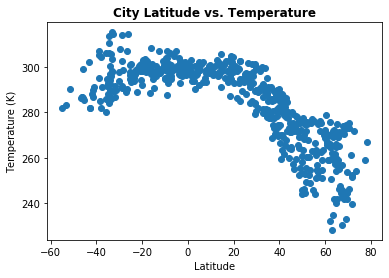

<Figure size 432x288 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature", fontsize=12, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

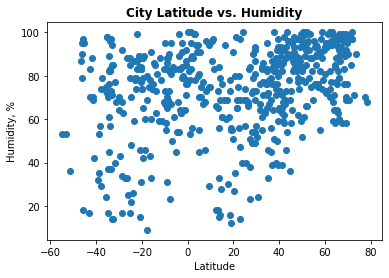

<Figure size 432x288 with 0 Axes>

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=12, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

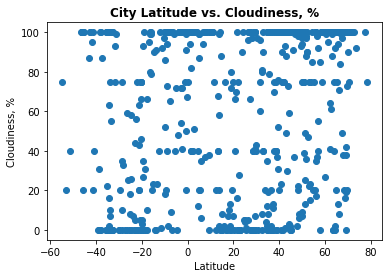

<Figure size 432x288 with 0 Axes>

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness, %", fontsize=12, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

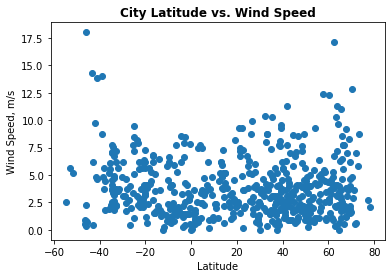

<Figure size 432x288 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=12, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed, m/s")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0), :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lagoa,39.0500,-27.9833,288.15,76,37,9.56,PT,1670525326
3,lata,40.1629,-8.3327,284.86,92,100,2.42,PT,1670525328
4,egvekinot,66.3167,-179.1667,246.80,92,71,1.77,RU,1670525328
5,san cristobal,7.7669,-72.2250,297.25,46,37,0.91,VE,1670524745
8,fort nelson,58.8053,-122.7002,254.79,74,75,1.03,CA,1670525330


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,53,20,5.66,CL,1670525240
2,rikitea,-23.1203,-134.9692,297.02,79,5,7.92,PF,1670525327
6,atuona,-9.8000,-139.0333,298.64,67,86,6.62,PF,1670525329
7,bredasdorp,-34.5322,20.0403,293.01,89,63,7.78,ZA,1670525329
9,ushuaia,-54.8000,-68.3000,281.96,53,75,2.57,AR,1670525330


###  Temperature vs. Latitude Linear Regression Plot

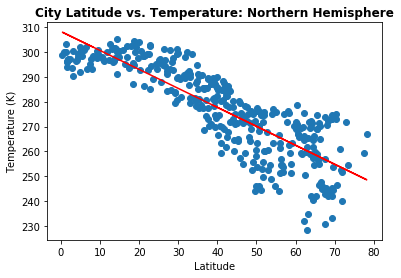

The correlation between city latitude and temperature in the northern hemisphere is -0.84.


<Figure size 432x288 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere
# Perform a linear regression on temp vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
pe_fit = pe_slope * (northern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature: Northern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(northern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig1.png")

print(f"The correlation between city latitude and temperature in the northern hemisphere is {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp']) [0],2)}.")

# Show plot
plt.show()

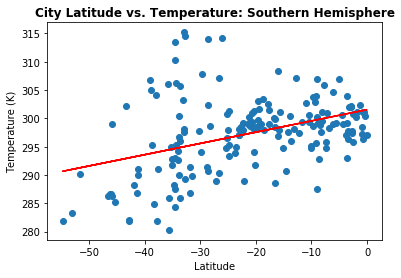

The correlation between city latitude and temperature in the southern hemisphere is 0.4.


<Figure size 432x288 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
# Perform a linear regression on temp vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
pe_fit = pe_slope * (southern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature: Southern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(southern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig2.png")

print(f"The correlation between city latitude and temperature in the southern hemisphere is {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp']) [0],2)}.")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a significant correlation between city latitude and temperature: as latitide increases in the nothern hemisphere, i.e. the further we are from the equator, average max temperatures decrease. Conversely, as latitude increases in the southern hemisphere, getting closer to the equator, max temperatures increase.

### Humidity vs. Latitude Linear Regression Plot

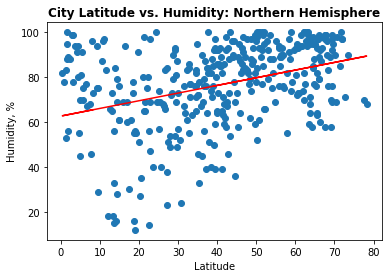

The correlation between city latitude and humidity in the northern hemisphere is 0.35.


<Figure size 432x288 with 0 Axes>

In [18]:
# Northern Hemisphere
# Perform a linear regression on humidity vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
pe_fit = pe_slope * (northern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity: Northern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(northern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig3.png")

print(f"The correlation between city latitude and humidity in the northern hemisphere is {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity']) [0],2)}.")

# Show plot
plt.show()

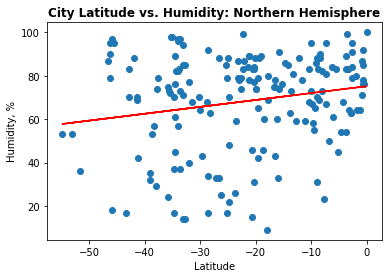

The correlation between city latitude and humidity in the southern hemisphere is 0.19.


<Figure size 432x288 with 0 Axes>

In [19]:
# Southern Hemisphere
# Perform a linear regression on humidity vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
pe_fit = pe_slope * (southern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity: Northern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(southern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig4.png")

print(f"The correlation between city latitude and humidity in the southern hemisphere is {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity']) [0],2)}.")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a correlation between city latitude and humidity: as latitide increases in the nothern hemisphere, i.e. the further we are from the equator, average humidity decreases. Conversely, as latitude increases in the southern hemisphere, getting closer to the equator, humidity increases. However, this corelation is less significant than that of temperatures vs. latitude as evidenced by the correlation coefficients closer to zero.

### Cloudiness vs. Latitude Linear Regression Plot

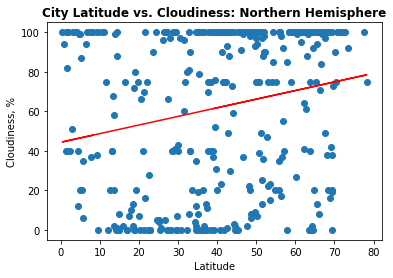

The correlation between city latitude and cloudiness in the northern hemisphere is 0.21.


<Figure size 432x288 with 0 Axes>

In [20]:
# Northern Hemisphere
# Perform a linear regression on cloudiness vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
pe_fit = pe_slope * (northern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness: Northern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(northern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig5.png")

print(f"The correlation between city latitude and cloudiness in the northern hemisphere is {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']) [0],2)}.")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (180,) and (369,)

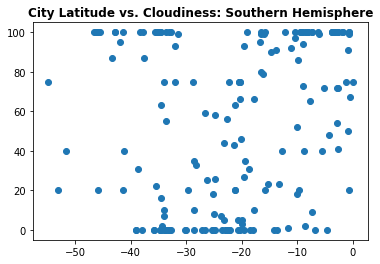

In [21]:
# Southern Hemisphere
# Perform a linear regression on cloudiness vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
pe_fit = pe_slope * (northern_hemi_df['Lat']) + pe_int

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness: Southern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(southern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig6.png")
print(f"The correlation between city latitude and cloudiness in the southern hemisphere is {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness']) [0],2)}.")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a significant correlation between city latitude and cloudiness in the northern hemisphere: as latitide increases in the nothern hemisphere, i.e. the further we are from the equator, clousiness increases. However, there is no significant corelation between cloudiness and latitude in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Perform a linear regression on Wind Speed vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
pe_fit = pe_slope * (northern_hemi_df['Lat']) + pe_int

# Build scatter plot for Wind Speed vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed: Northern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(northern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed, m/s")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig7.png")
print(f"The correlation between city latitude and wind speed in the northern hemisphere is {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']) [0],2)}.")


# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Perform a linear regression on Wind Speed vs lat
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
pe_fit = pe_slope * (southern_hemi_df['Lat']) + pe_int

# Build scatter plot for Wind Speed vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed: Southern Hemisphere", fontsize=12, fontweight="bold")
plt.plot(southern_hemi_df['Lat'],pe_fit, linewidth=1.5, color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed, m/s")
plt.show()

# Save the figure
plt.savefig("..\output_data\Fig7.png")
print(f"The correlation between city latitude and wind speed in the northern hemisphere is {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed']) [0],2)}.")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a correlation between city latitude and wind speed: as latitide increases in the nothern hemisphere, i.e. the further we are from the equator, wind speed slightly increases. Conversely, as latitude increases in the southern hemisphere, getting closer to the equator, wind speed decreases. There is a stronger correlation between latitude and windspeed in the southern hemisphere.